<img src="pk.jpeg" alt="Image description" width="500" height="500">

# **Project: Weather Real-Time Pakistan Cities Data Analysis**

## **Part 1: Data Scraping (Data Collection using OpenWeather API)**
- Use the OpenWeather API to collect real-time weather data for cities in Pakistan.
- Gather details such as temperature, humidity, wind speed, cloudiness, and description.

## **Part 2: Data Exploration**
- Perform initial data exploration to understand the features.
- Analyze summary statistics for numerical and categorical variables.

## **Part 3: Data Cleaning**
- Handle missing (e.g., fill missing values, drop duplicates).
- Convert columns (e.g., `Sunrise`, `Sunset`) to appropriate data types.
- Normalize column names and ensure data consistency.

## **Part 4: Exploratory Data Analysis (EDA)**
- Analyze the distribution of numerical variables (e.g., temperature, humidity).
- Explore correlations between features.
- Investigate outliers and patterns in the dataset.
- Group and compare cities based on weather conditions.

## **Part 5: Data Visualization Using Seaborn and Matplotlib**
- Create visualizations such as histograms, scatterplots, boxplots, and heatmaps.
- Plot trends in weather conditions across cities.
- Visualize relationships between variables (e.g., temperature vs. humidity, cloudiness vs. wind speed).

`Note: This structure provides a clear breakdown of the steps involved in your project.`

# Part 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

### *Downloading and loading Pakistan's cities data from Kaggle*

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/muhammadadeel5953/pakistan-cities-csv")

Skipping, found downloaded files in ".\pakistan-cities-csv" (use force=True to force download)


In [3]:
cities = pd.read_csv("pakistan-cities-csv\pakistan_cities.csv")
cities.sample(10)

,City,Province,Country
127,Qila Saifullah,Balochistan,Pakistan
17,Matiari,Sindh,Pakistan
68,Kahror Pakka,Punjab,Pakistan
106,Shergarh,Khyber Pakhtunkhwa,Pakistan
3,Larkana,Sindh,Pakistan
61,Hafizabad,Punjab,Pakistan
36,Sann,Sindh,Pakistan
113,Zhob,Balochistan,Pakistan
115,Lasbela,Balochistan,Pakistan
26,Pano Aqil,Sindh,Pakistan


In [4]:
cities.shape

(147, 3)

### *Use the OpenWeather API to collect real-time weather data for cities in Pakistan.*

[OpenWeather API](https://openweathermap.org/api) ⬅️ Click here

In [5]:
weather = []
for index, val in cities.iterrows():
    city_name = val['City']
    country_name = val['Country']
    province = val['Province']
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid=3246c725e45e00883f6ff17837aa186e&units=metric"
    response = requests.get(url)
    
    if response.status_code == 200:
        
        temp = response.json()["main"]["temp"]
        feels_like = response.json()["main"]["feels_like"]
        temp_min = response.json()["main"]["temp_min"]
        temp_max = response.json()["main"]["temp_max"]
        pressure = response.json()["main"]["pressure"]
        humidity = response.json()["main"]["humidity"]
        wind_speed = response.json()["wind"]["speed"]
        descrip = response.json()["weather"][0]["description"]
        clouds = response.json()["clouds"]["all"]
        lon = response.json()["coord"]["lon"]
        lat = response.json()["coord"]["lat"]
        sunrise_unix = response.json()['sys']['sunrise']
        sunset_unix = response.json()['sys']['sunset']
        
        # Convert Unix timestamps to human-readable format
        sunrise = datetime.fromtimestamp(sunrise_unix).strftime('%I:%M %p')
        sunset = datetime.fromtimestamp(sunset_unix).strftime('%I:%M %p')
    
        
        weather.append({
            "Country": country_name,
            "Province": province,
            "City": city_name,
            "Temperature": temp,
            "Feels_Like": feels_like,
            'Min_Temp': temp_min,
            'Max_Temp': temp_max,
            'Humidity': humidity,
            'Pressure': pressure,
            'Wind_Speed': wind_speed,
            'Cloudiness': clouds,
            'Description': descrip.title(),
            'Longitude': lon,
            'Latitude': lat,
            'Sunrise': sunrise,
            'Sunset': sunset
        })
    else:
        continue

In [6]:
weather_df = pd.DataFrame(weather)

# Part 2

### Overview of the structure of the data

In [7]:
weather_df.sample(10)

,Country,Province,City,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Description,Longitude,Latitude,Sunrise,Sunset
48,Pakistan,Punjab,Chiniot,30.71,30.82,30.71,30.71,42,1004,2.10,2,Clear Sky,72.9789,31.7200,05:56 AM,06:05 PM
17,Pakistan,Sindh,Ghotki,32.90,32.33,32.90,32.90,33,1003,1.37,0,Clear Sky,69.3161,28.0060,06:11 AM,06:19 PM
66,Pakistan,Punjab,Shorkot,33.34,33.10,33.34,33.34,34,1003,2.50,0,Clear Sky,70.8774,31.9099,06:04 AM,06:13 PM
51,Pakistan,Punjab,Khushab,29.75,30.13,29.75,29.75,46,1005,3.03,0,Clear Sky,72.3525,32.2967,05:58 AM,06:07 PM
57,Pakistan,Punjab,Pattoki,29.01,29.80,29.01,29.01,51,1005,1.86,6,Clear Sky,73.8500,31.0167,05:52 AM,06:01 PM
10,Pakistan,Sindh,Khairpur,32.43,34.18,32.43,32.43,46,1004,4.31,2,Clear Sky,68.7617,27.5295,06:13 AM,06:21 PM
21,Pakistan,Sindh,Samaro,27.49,29.71,27.49,27.49,70,1006,7.67,4,Clear Sky,69.3965,25.2815,06:11 AM,06:19 PM
76,Pakistan,Khyber Pakhtunkhwa,Mansehra,20.87,20.94,20.87,20.87,74,1009,1.85,0,Clear Sky,73.2000,34.3333,05:55 AM,06:04 PM
107,Pakistan,Balochistan,Panjgur,25.65,26.02,25.65,25.65,67,1009,3.56,4,Clear Sky,64.0903,26.9645,06:32 AM,06:40 PM
91,Pakistan,Balochistan,Gwadar,27.01,29.95,27.01,27.01,82,1007,2.50,46,Scattered Clouds,62.3254,25.1216,06:39 AM,06:47 PM


In [8]:
# Check the data types
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      118 non-null    object 
 1   Province     118 non-null    object 
 2   City         118 non-null    object 
 3   Temperature  118 non-null    float64
 4   Feels_Like   118 non-null    float64
 5   Min_Temp     118 non-null    float64
 6   Max_Temp     118 non-null    float64
 7   Humidity     118 non-null    int64  
 8   Pressure     118 non-null    int64  
 9   Wind_Speed   118 non-null    float64
 10  Cloudiness   118 non-null    int64  
 11  Description  118 non-null    object 
 12  Longitude    118 non-null    float64
 13  Latitude     118 non-null    float64
 14  Sunrise      118 non-null    object 
 15  Sunset       118 non-null    object 
dtypes: float64(7), int64(3), object(6)
memory usage: 14.9+ KB


### Summary Statistics

In [9]:
# Get summary statistics for numerical columns (Temperature, Humidity, etc.)
weather_df.describe()

,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Longitude,Latitude
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,28.293644,28.954407,28.286525,28.304576,51.686441,1006.305085,2.893814,6.711864,68.865442,29.756936
std,4.226020,4.619582,4.251377,4.189561,17.748335,3.533741,2.025876,17.702722,12.564892,5.103704
min,13.740000,13.230000,12.900000,14.020000,12.000000,1003.000000,0.000000,0.000000,-9.569000,8.518500
25%,26.820000,26.902500,26.820000,26.820000,39.000000,1004.000000,1.755000,0.000000,68.239900,27.177450
50%,28.875000,30.215000,28.875000,28.875000,49.000000,1005.000000,2.420000,1.000000,70.618750,30.246500
75%,31.245000,31.660000,31.245000,31.245000,65.000000,1007.000000,3.287500,6.000000,72.690000,32.095900
max,35.200000,37.680000,35.200000,35.200000,99.000000,1022.000000,9.280000,100.000000,117.789200,51.445000


### Exploring Categorical Columns

In [10]:
weather_df["City"].unique()

array(['Karachi', 'Hyderabad', 'Sukkur', 'Larkana', 'Nawabshah',
       'Jacobabad', 'Dadu', 'Thatta', 'Badin', 'Shikarpur', 'Khairpur',
       'Tando Adam', 'Tando Allahyar', 'Sanghar', 'Umerkot', 'Jamshoro',
       'Matiari', 'Ghotki', 'Qambar', 'Shahdadkot', 'Hala', 'Samaro',
       'Pano Aqil', 'Pithoro', 'Pir Jo Goth', 'Kotri', 'Daro', 'Daur',
       'Kandiaro', 'Shahpur Chakar', 'Lakha', 'Sann', 'Khipro', 'Lahore',
       'Faisalabad', 'Rawalpindi', 'Multan', 'Gujranwala', 'Sialkot',
       'Bahawalpur', 'Sargodha', 'Sheikhupura', 'Jhang', 'Kasur', 'Okara',
       'Sahiwal', 'Dera Ghazi Khan', 'Toba Tek Singh', 'Chiniot',
       'Narowal', 'Mianwali', 'Khushab', 'Layyah', 'Bhakkar', 'Hafizabad',
       'Muridke', 'Jaranwala', 'Pattoki', 'Arifwala', 'Burewala',
       'Pakpattan', 'Kahror Pakka', 'Kot Addu', 'Depalpur', 'Samundri',
       'Khanewal', 'Shorkot', 'Peshawar', 'Mardan', 'Kohat',
       'Dera Ismail Khan', 'Bannu', 'Charsadda', 'Nowshera', 'Haripur',
       'Abbottabad

In [11]:
weather_df.groupby("Province")["Description"].value_counts()

Province            Description     
Balochistan         Clear Sky           25
                    Few Clouds           1
                    Overcast Clouds      1
                    Scattered Clouds     1
Khyber Pakhtunkhwa  Clear Sky           22
                    Light Rain           1
Punjab              Clear Sky           30
                    Smoke                3
                    Few Clouds           1
Sindh               Clear Sky           29
                    Few Clouds           1
                    Haze                 1
                    Light Rain           1
                    Overcast Clouds      1
Name: Description, dtype: int64

# Part 3

### Normalize Column Names

In [12]:
# Normalize column names (lowercase and replace spaces with underscores)
weather_df.columns = weather_df.columns.str.lower()

In [13]:
weather_df.columns

Index(['country', 'province', 'city', 'temperature', 'feels_like', 'min_temp',
       'max_temp', 'humidity', 'pressure', 'wind_speed', 'cloudiness',
       'description', 'longitude', 'latitude', 'sunrise', 'sunset'],
      dtype='object')

### Check for Duplicates

In [14]:
print(f"There are {weather_df.duplicated().sum()} duplicates")

There are 0 duplicates


### Convert Columns to Appropriate Data Types

In [15]:
# Convert 'Sunrise' and 'Sunset' to datetime format
weather_df['sunrise'] = pd.to_datetime(weather_df['sunrise'], errors='coerce')
weather_df['sunset'] = pd.to_datetime(weather_df['sunset'], errors='coerce')

In [16]:
weather_df.head()

,country,province,city,temperature,feels_like,min_temp,max_temp,humidity,pressure,wind_speed,cloudiness,description,longitude,latitude,sunrise,sunset
0,Pakistan,Sindh,Karachi,27.90,31.00,27.90,27.90,74,1008,4.12,20,Few Clouds,67.0822,24.9056,2024-09-22 06:20:00,2024-09-22 18:28:00
1,Pakistan,Sindh,Hyderabad,23.73,24.46,23.73,23.73,88,1006,2.57,75,Haze,78.4744,17.3753,2024-09-22 05:35:00,2024-09-22 17:42:00
2,Pakistan,Sindh,Sukkur,33.15,33.80,33.15,33.15,39,1004,4.42,2,Clear Sky,68.8574,27.7052,2024-09-22 06:13:00,2024-09-22 18:21:00
3,Pakistan,Sindh,Larkana,31.74,32.26,31.74,31.74,42,1004,3.30,0,Clear Sky,68.2141,27.5551,2024-09-22 06:15:00,2024-09-22 18:24:00
4,Pakistan,Sindh,Nawabshah,30.13,32.29,30.13,30.13,56,1004,5.60,6,Clear Sky,68.4096,26.2483,2024-09-22 06:14:00,2024-09-22 18:23:00


# Part (4,5)

### Analyzing Distribtution on Numerical Columns

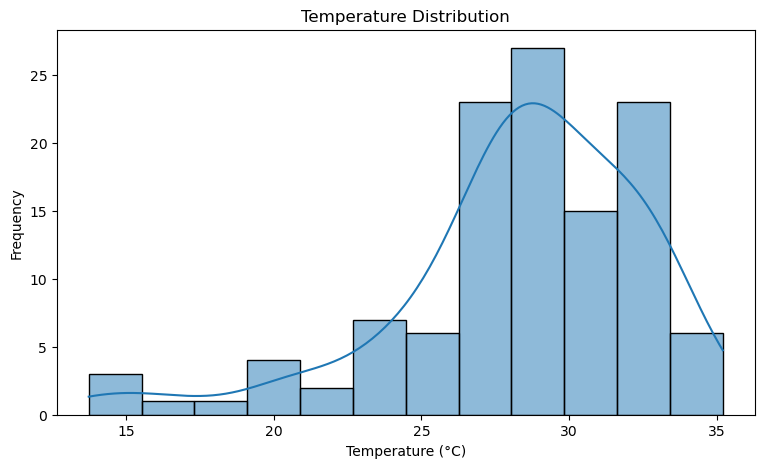

In [17]:
plt.figure(figsize=(9, 5))

sns.histplot(weather_df['temperature'], kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

plt.show()

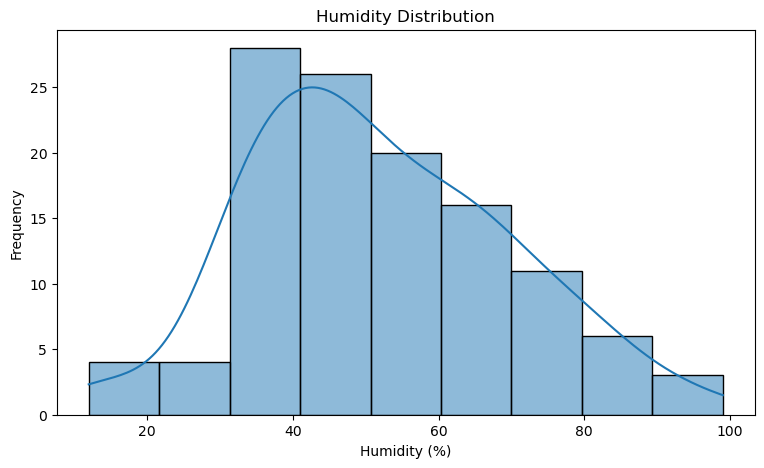

In [18]:
plt.figure(figsize=(9, 5))

sns.histplot(weather_df['humidity'], kde=True)
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')

plt.show()

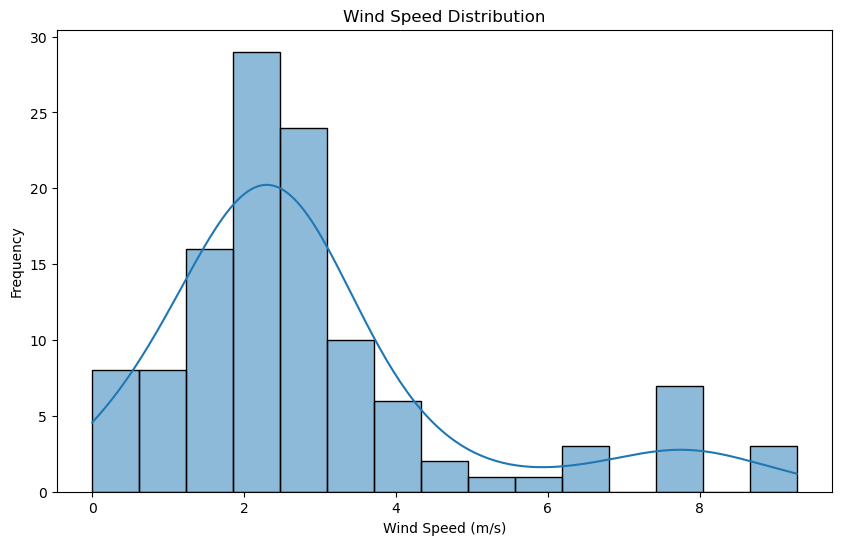

In [19]:
# Histogram for Wind Speed
plt.figure(figsize=(10, 6))
sns.histplot(weather_df['wind_speed'], kde=True)
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()

### Top 10 Cities with the Highest Average Wind Speed

In [20]:
weather_df[["city","province","wind_speed",]].sort_values(by = "wind_speed", ascending=False).head(10)

,city,province,wind_speed
15,Jamshoro,Sindh,9.28
25,Kotri,Sindh,8.86
16,Matiari,Sindh,8.71
23,Pithoro,Sindh,8.02
12,Tando Allahyar,Sindh,7.95
11,Tando Adam,Sindh,7.84
32,Khipro,Sindh,7.74
21,Samaro,Sindh,7.67
20,Hala,Sindh,7.56
13,Sanghar,Sindh,7.54


### Top 10 Cities with Highest Temperature

In [21]:
weather_df[["city","province","temperature",]].sort_values(by = "temperature", ascending=False).head(10)

,city,province,temperature
104,Sibi,Balochistan,35.20
77,Lakki Marwat,Khyber Pakhtunkhwa,34.08
22,Pano Aqil,Sindh,33.77
6,Dadu,Sindh,33.68
79,Tank,Khyber Pakhtunkhwa,33.48
70,Dera Ismail Khan,Khyber Pakhtunkhwa,33.44
53,Bhakkar,Punjab,33.40
66,Shorkot,Punjab,33.34
95,Dera Murad Jamali,Balochistan,33.24
39,Bahawalpur,Punjab,33.17


### Top 10 Coldest Cities

In [22]:
weather_df[["city","province","temperature",]].sort_values(by = "temperature").head(10)

,city,province,temperature
92,Hub,Balochistan,13.74
78,Hangu,Khyber Pakhtunkhwa,14.02
115,Kahan,Balochistan,15.25
109,Garmab,Balochistan,16.16
102,Ziarat,Balochistan,17.56
75,Abbottabad,Khyber Pakhtunkhwa,19.84
80,Dir,Khyber Pakhtunkhwa,20.63
82,Upper Dir,Khyber Pakhtunkhwa,20.63
76,Mansehra,Khyber Pakhtunkhwa,20.87
26,Daro,Sindh,21.18


### Top 10 Cities with Highest Cloudiness 

In [23]:
weather_df[["city","province","cloudiness",]].sort_values(by = "cloudiness", ascending=False).head(10)

,city,province,cloudiness
114,Nasirabad,Balochistan,100
26,Daro,Sindh,100
14,Umerkot,Sindh,96
1,Hyderabad,Sindh,75
91,Gwadar,Balochistan,46
38,Sialkot,Punjab,40
88,Bara,Khyber Pakhtunkhwa,36
0,Karachi,Sindh,20
63,Depalpur,Punjab,14
108,Awaran,Balochistan,11
